# Spotify Project: Data Processing with Pandas and a Little Numpy
## Top 50 Spotify Tracks of 2020
### Load the data using Pandas.
#### Data found here: https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020

Perform data cleaning by:

    Handling missing values.
    Removing duplicate samples and features.
    Treating the outliers.

Perform exploratory data analysis. Analysis provides answers to these questions:

    How many observations are there in this dataset?
    How many features this dataset has?
    Which of the features are categorical?
    Which of the features are numeric?
    Are there any artists that have more than 1 popular track? If yes, which and how many?
    Who was the most popular artist?
    How many artists in total have their songs in the top 50?
    Are there any albums that have more than 1 popular track? If yes, which and how many?
    How many albums in total have their songs in the top 50?
    Which tracks have a danceability score above 0.7?
    Which tracks have a danceability score below 0.4?
    Which tracks have their loudness above -5?
    Which tracks have their loudness below -8?
    Which track is the longest?
    Which track is the shortest?
    Which genre is the most popular?
    Which genres have just one song on the top 50?
    How many genres in total are represented in the top 50?
    Which features are strongly positively correlated?
    Which features are strongly negatively correlated?
    Which features are not correlated?

Also, the project entails: How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

*   Download the data from Spotify Top 50 Tracks of 2020 dataset.
*   Load the data using Pandas.





In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

songs = pd.read_csv('https://raw.githubusercontent.com/DigDataSteve/Spotify_Project_Top_50_List_Analysis/main/spotifytoptracks.csv', index_col=False)

songs.head(3)

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap


### Perform data cleaning by:

*   Handling missing values.
*   Removing duplicate samples and features.
*   Treating the outliers.



    
   


In [3]:
"""Learn if any cells contain NAs"""
songs.isna().sum()

Unnamed: 0          0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [4]:
"""Learn if any cells are null."""
songs.isnull().sum()

Unnamed: 0          0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [5]:
"""Looking for duplicate rows."""
songs.duplicated().sum()

0

###There appears to be no null values nor duplicate rows in the dataframe.

# Understand the data types and look for potential outliers.

In [6]:
"""Show rows then columns."""
songs.shape

(50, 17)

In [7]:
"""Show column data types."""
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

In [8]:
"""Show basic statistical information."""
songs.describe()[['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


# First Visualize the Data to Discern Outliers
##Create histograms

array([[<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_ms'}>, <Axes: >, <Axes: >]],
      dtype=object)

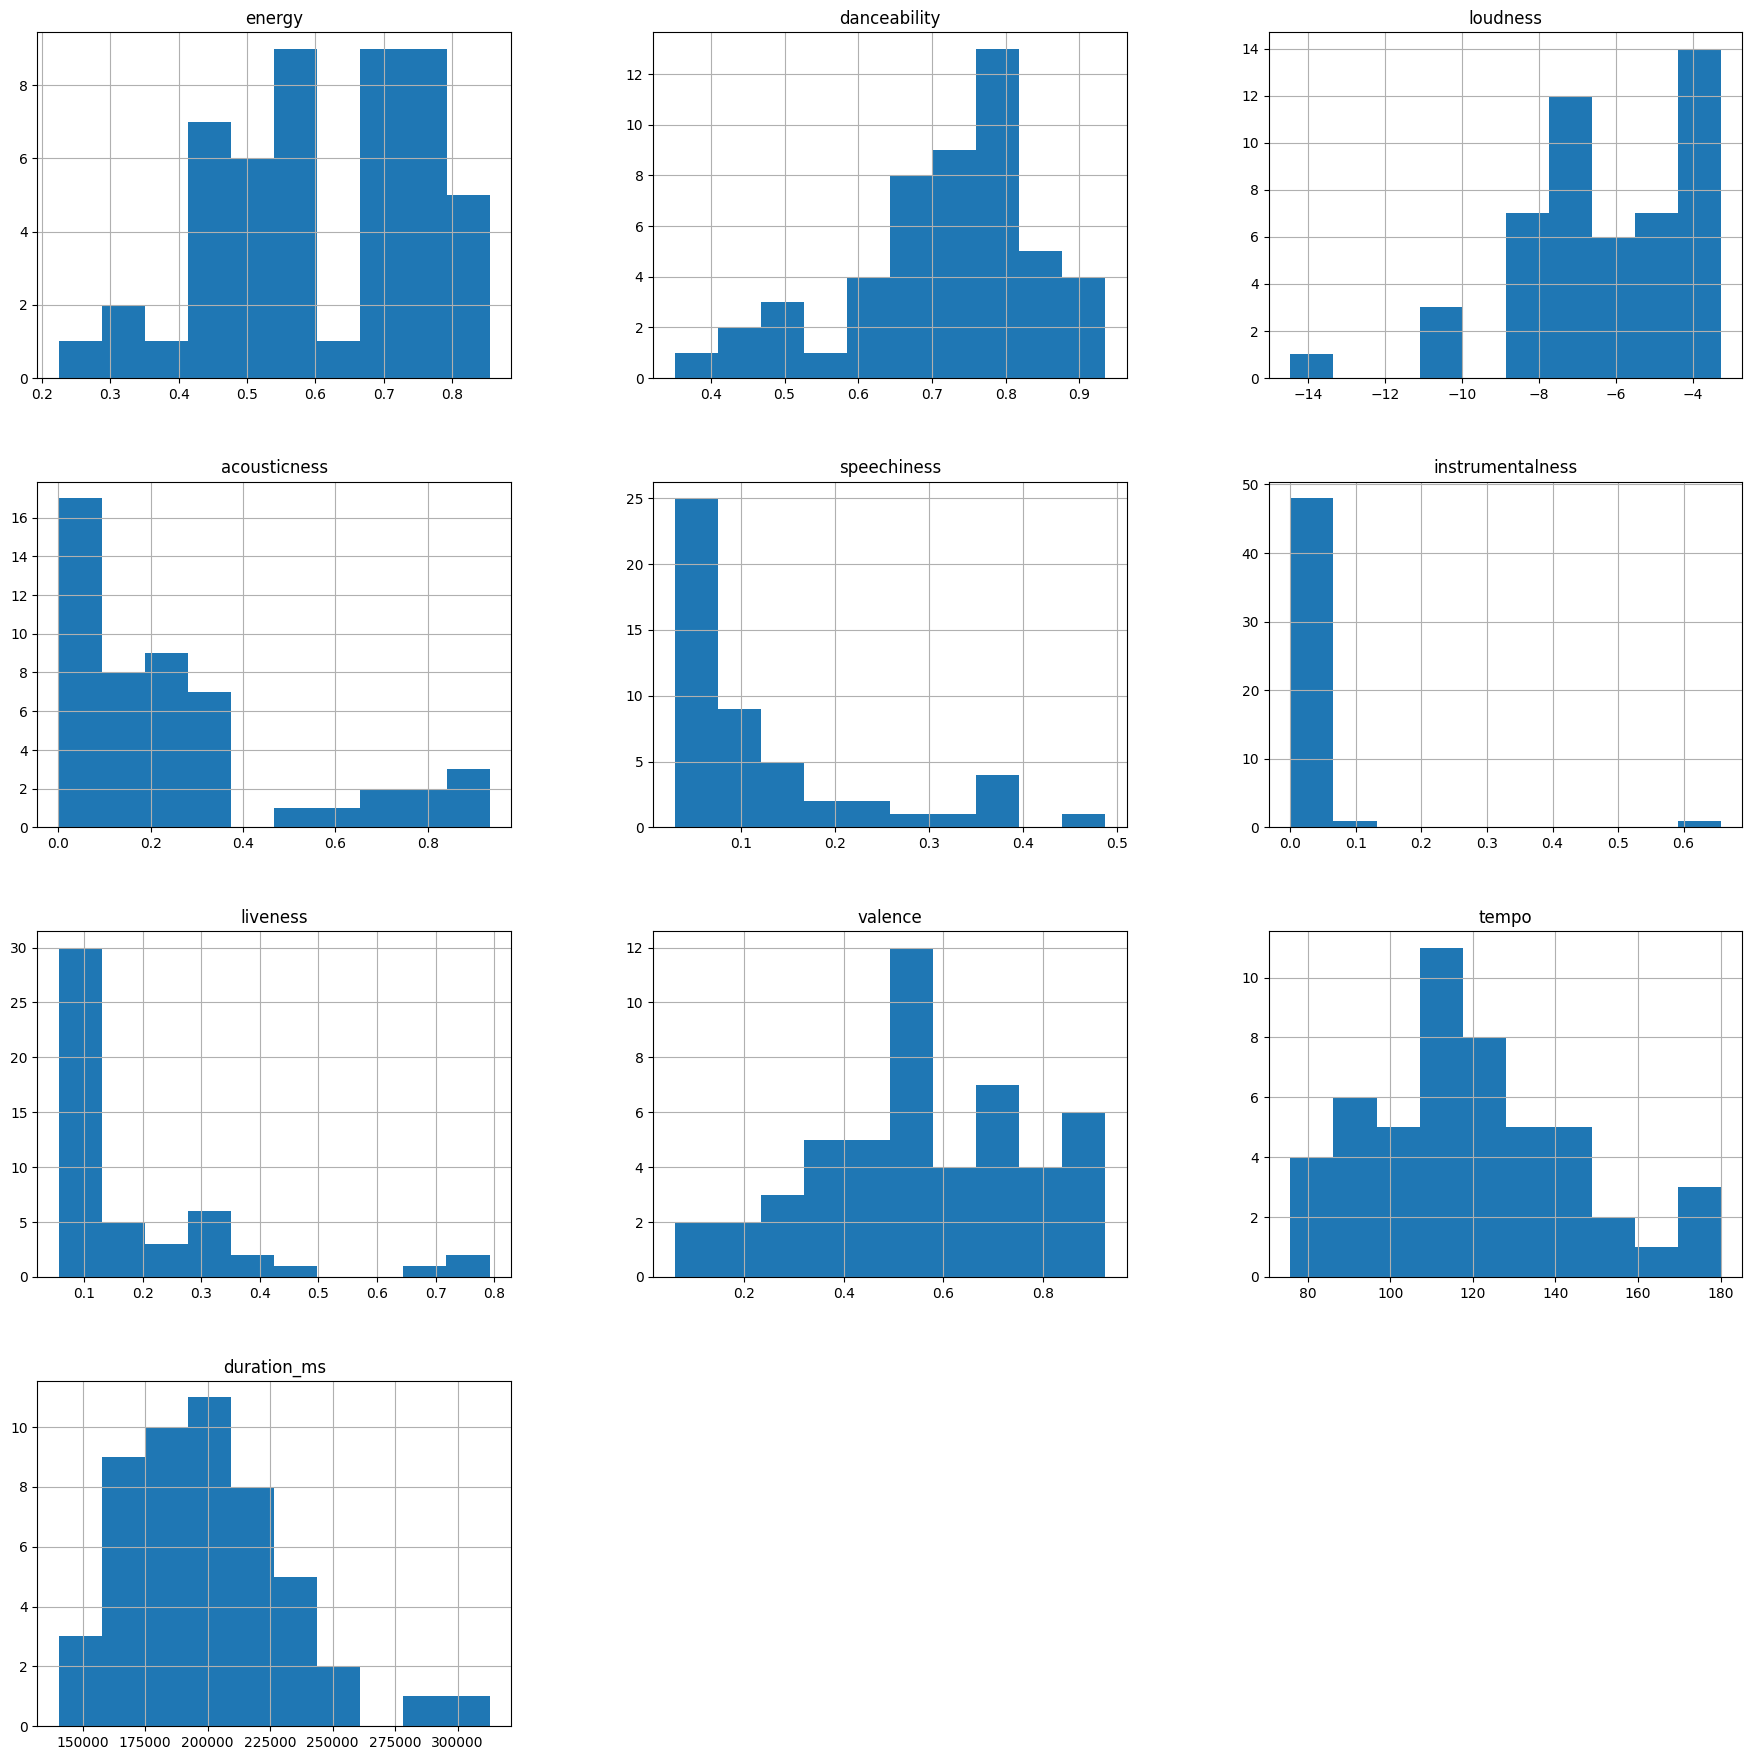

In [9]:
songs.hist(column:=['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'], figsize=(22,22))

# From the histograms above, potential outliers** can be seen in the speechiness, instrumentalness, liveness, loudness, and duration_ms columns.
### **i.e. data that is outside of the 1st (`q1`) or 3rd (`q3`) quartile

In [10]:
#Use plotly boxplot to get an initial five-number summary
fig = px.box(songs, y=['energy', 'danceability', 'acousticness', 'speechiness', 'liveness', 'valence'], title='Initial Outlier Analysis using Box Plots')
fig.update_layout(template='plotly_dark')
fig.show()

# From the boxplots above, more columns such as danceability and acousticness show possible outliers.

In [11]:
fig = px.box(songs, y=['duration_ms'], title='Initial Outlier Analysis with Boxplot for the Song\'s Duration')
fig.update_layout(template='plotly_dark')
fig.show()

In [12]:
fig = px.box(songs, y=['loudness'], title='Initial Outlier Analysis:')
fig.update_layout(template='plotly_dark')
fig.show()

In [13]:
fig = px.box(songs, y=['tempo'], title='Initial Outlier Analysis:')
fig.update_layout(template='plotly_dark')
fig.show()

In [14]:
fig = px.box(songs, y=['instrumentalness'], title='Initial Outlier Analysis:')
fig.update_layout(template='plotly_dark')
fig.show()

# Treating the Outliers

## As mentioned above, there are a few potential outliers. 'Potential' is used because, yes, these data points are outide of either the `q1` or `q3` quartiles. However, the way that the data is categorized seems to change what an outlier is in certain cases. 

  For example, with `danceability` two outliers are shown as these data points lie past the `q1` qaurtile. However, as the `danceability` numeric value is closer to `1` the more danceable the song is, so in these two cases it simply indicates that these songs are just more non-danceable than others and of course, danceability is subjective, so these I am not considering them as outliers. Technically it is an outlier, but understanding the numbers behind the data indicates that it is not. If the number was say above `1` such as `121` or below `0` such as `-33` then these would definitely be an outlier. Neither will I classify the so-called outliers of `Acousticness`, `Speechiness`, or `Liveliness` because they are within the range of `0` and `1`.

  The `instrumentalness` column contains the largest outlier as can be discerned from the boxplot analysis. However, instrumentalness means the likelihood that the song contains NO vocals, i.e. spoken words. So, if it is zero, then it has spoken words. If it the instrumentalness is above zero such as with a value of 0.657, then it most likely has spoken words. It is clear then that most (48 out of 50) of the songs have spoken words as shown by the calculation below. Given this, the numbers in this column have been changed to indicate if it is a vocal song or an instrumental song with `0` indicating it is a vocal song and `1` indicating if it is an instrumental song.

  For the `Loudness` column, the one potential outlier will be treated as such and rather than eliminating the value, it will be capped at a value of the mean minus 3 standard deviations, which is: `-6.225900 + -2.349744` and that equals: `-13.275132`.

  The potential outlier in the `duration_ms` will not be treated as such since the song can be an extended one. However, if the value was say 10X or 20X or larger past the mean, then that would be treated as an outlier.



In [15]:
"""Summing number of non-vocal songs and vocal songs."""
words = 0
no_words = 0
for i in songs['instrumentalness']:
  #rounding value to 1/100
  if round(i, 2) == 0:
    no_words = no_words + 1
  else:
    words = words + 1

print('Songs with vocals:', words, ' |  Songs with No Vocals:', no_words)

Songs with vocals: 2  |  Songs with No Vocals: 48


In [16]:
"""Change potential outlier values and have a working Pandas dataframe for analysis."""
songs['instrumentalness'] = np.where(songs['instrumentalness'] >= 0.05, 1, songs['instrumentalness'])
songs['instrumentalness'] = np.where(songs['instrumentalness'] < 0.05, 0, songs['instrumentalness'])
songs['loudness'] = np.where(songs['loudness'] == -14.454, -13.275132, songs['loudness'])

# Analysis Questions and Answers




# How many observations are there in this dataset?

In [17]:
"""Number of observations."""
songs.shape[0]

50

#How many features this dataset has?

In [18]:
"""Number of features = number of columns."""
print('Number of features: ', songs.shape[1])

for f in songs.columns:
  print(f)

Number of features:  17
Unnamed: 0
artist
album
track_name
track_id
energy
danceability
key
loudness
acousticness
speechiness
instrumentalness
liveness
valence
tempo
duration_ms
genre


#  Which of the features are categorical?
# genre, album, artist, track_name, track_id, key

# Which of the features are numeric?
# energy (range 0 to 1), danceability, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms

# Are there any artists that have more than 1 popular track? If yes, which and how many?

### Answer:
*   Billie Eilish      3
*   Dua Lipa           3
*   Travis Scott       3
*   Justin Bieber      2
*   Harry Styles       2
*   Lewis Capaldi      2
*   Post Malone        2



In [19]:
"""Get value counts and then find artists with more than one value count"""
artists = songs['artist'].value_counts()
print(f'Artists with more than one on ths list: \n\n{artists[artists > 1]}')

Artists with more than one on ths list: 

Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: artist, dtype: int64


# Who was the most popular artist?

In [20]:
"""Using 'mode' will find the value that appears most often. In this case three artists are tied."""
print('Who is the most popular artist?\n\n', songs['artist'].mode().to_string(index=False))

Who is the most popular artist?

 Billie Eilish
     Dua Lipa
 Travis Scott


# How many artists in total have their songs in the top 50?

In [21]:
print('Number of artists in top 50:\n\n', songs.artist.drop_duplicates().size, 'artists')


Number of artists in top 50:

 40 artists


# Are there any albums that have more than 1 popular track? If yes, which and how many?

In [22]:
tracks = songs['album'].value_counts()
tracks = tracks[tracks > 1]
print(f'Here are the albums that have more than 1 popular track:\n\n{tracks.to_string()}')

Here are the albums that have more than 1 popular track:

Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2


# How many albums in total have their songs in the top 50?

In [23]:

count = songs.album.drop_duplicates().size
print(f'Unique albums in top 50 list: {count}')

Unique albums in top 50 list: 45


# Which tracks have a danceability score above 0.7?

In [24]:
r = songs.loc[songs['danceability'] > 0.7, ['artist', 'track_name', 'danceability']]
r.sort_values(by='danceability',ascending=False)

,artist,track_name,danceability
27,Cardi B,WAP (feat. Megan Thee Stallion),0.935
2,Roddy Ricch,The Box,0.896
39,Regard,Ride It,0.880
28,Surfaces,Sunday Best,0.878
33,BENEE,Supalonely (feat. Gus Dapperton),0.862
40,Travis Scott,goosebumps,0.841
49,Travis Scott,SICKO MODE,0.834
15,Drake,Toosie Slide,0.830
1,Tones And I,Dance Monkey,0.825
29,Eminem,Godzilla (feat. Juice WRLD),0.808


#  Which tracks have a danceability score below 0.4?

In [25]:
r = songs.loc[songs.danceability < 0.4, ['track_name', 'artist', 'danceability']]
r.sort_values(by='danceability', ascending=False)

,track_name,artist,danceability
44,lovely (with Khalid),Billie Eilish,0.351


# Which tracks have their loudness above -5?

In [26]:
r = songs.loc[songs.loudness > -5, ['track_name', 'artist', 'loudness']]
r.sort_values(by='loudness', ascending=False)

,track_name,artist,loudness
10,Tusa,KAROL G,-3.280
40,goosebumps,Travis Scott,-3.370
31,Break My Heart,Dua Lipa,-3.434
38,Hawái,Maluma,-3.454
12,Circles,Post Malone,-3.497
23,Mood (feat. iann dior),24kGoldn,-3.558
21,Adore You,Harry Styles,-3.675
49,SICKO MODE,Travis Scott,-3.714
48,Physical,Dua Lipa,-3.756
35,Rain On Me (with Ariana Grande),Lady Gaga,-3.764


# Which tracks have their loudness below -8?

In [27]:
songs.loc[songs.loudness < -8, ['track_name', 'artist', 'loudness']].sort_values(by='loudness', ascending=False)

,track_name,artist,loudness
20,Savage Love (Laxed - Siren Beat),Jawsh 685,-8.520000
8,Falling,Trevor Daniel,-8.756000
36,HIGHEST IN THE ROOM,Travis Scott,-8.764000
7,death bed (coffee for your head),Powfu,-8.765000
15,Toosie Slide,Drake,-8.820000
47,If the World Was Ending - feat. Julia Michaels,JP Saxe,-10.086000
44,lovely (with Khalid),Billie Eilish,-10.109000
26,bad guy,Billie Eilish,-10.965000
24,everything i wanted,Billie Eilish,-13.275132


# Which track is the longest?

In [28]:
"""Use the .lod property to return a series."""
r = songs.loc[songs.duration_ms.idxmax(), ['track_name', 'duration_ms']]
print(f'The longest track is: {r.track_name} and it is {r.duration_ms} seconds long.')

The longest track is: SICKO MODE and it is 312820 seconds long.


#  Which track is the shortest?

In [29]:
"""Use idxmax to find the shortest song"""
s = songs.loc[songs.duration_ms.idxmin(), ['track_name', 'duration_ms']]
print(f'The shortest track is {s.track_name} and it is {s.duration_ms} seconds long.')

The shortest track is Mood (feat. iann dior) and it is 140526 seconds long.


# Which genre is the most popular?

In [30]:
"""What genre is listed the most on the list?"""
pd.DataFrame(songs['genre'].value_counts().head(1))

,genre
Pop,14


# Which genres have just one song on the top 50?

In [31]:
"""Convert series into a datafram and then use the loc property to return the genres."""
one_song = pd.DataFrame(songs['genre'].value_counts() == 1)
one_song.loc[one_song.genre == True, []]


""
Nu-disco
R&B/Hip-Hop alternative
Pop/Soft Rock
Pop rap
Hip-Hop/Trap
Dance-pop/Disco
Disco-pop
Dreampop/Hip-Hop/R&B
Alternative/reggaeton/experimental
Chamber pop


# How many genres in total are represented in the top 50?

In [32]:
"""Find the total number of non-duplicated genres in the list."""
total = songs.genre.drop_duplicates().count()
print(f'The total genres in the top 50 list is: {total}.')

The total genres in the top 50 list is: 16.


# Which features are strongly positively correlated?
## The features most positively correlated are loudness and energy. 
##That is, they move in the same direction, i.e. as one increases the other increases.

In [33]:
features = songs[['danceability', 'tempo', 'loudness', 'energy', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']]
features.corr()
 

,danceability,tempo,loudness,energy,acousticness,speechiness,instrumentalness,liveness,valence,duration_ms
danceability,1.000000,0.168956,0.171936,0.152552,-0.359135,0.226148,-0.023462,-0.006648,0.479953,-0.033763
tempo,0.168956,1.000000,0.105813,0.075191,-0.241119,0.215504,0.063904,0.025457,0.045089,0.130328
loudness,0.171936,0.105813,1.000000,0.793040,-0.490397,-0.024700,-0.537527,-0.077828,0.405734,0.080557
energy,0.152552,0.075191,0.793040,1.000000,-0.682479,0.074267,-0.379802,0.069487,0.393453,0.081971
acousticness,-0.359135,-0.241119,-0.490397,-0.682479,1.000000,-0.135392,0.278914,-0.128384,-0.243192,-0.010988
speechiness,0.226148,0.215504,-0.024700,0.074267,-0.135392,1.000000,0.199500,-0.142957,0.053867,0.366976
instrumentalness,-0.023462,0.063904,-0.537527,-0.379802,0.278914,0.199500,1.000000,-0.109224,-0.145995,0.120103
liveness,-0.006648,0.025457,-0.077828,0.069487,-0.128384,-0.142957,-0.109224,1.000000,-0.033366,-0.090188
valence,0.479953,0.045089,0.405734,0.393453,-0.243192,0.053867,-0.145995,-0.033366,1.000000,-0.039794
duration_ms,-0.033763,0.130328,0.080557,0.081971,-0.010988,0.366976,0.120103,-0.090188,-0.039794,1.000000


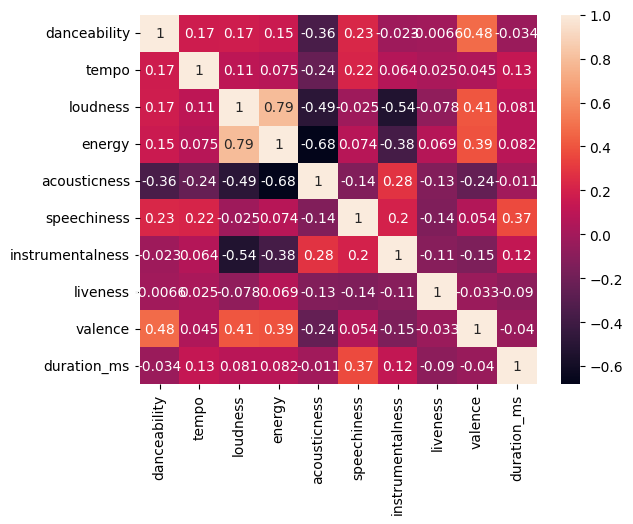

In [34]:
"""Visualize the correlation to make it easier to spot values."""
correlations = features.corr()
sns.heatmap(correlations, annot=True)
plt.rcParams['font.size'] = 9
plt.show()

# Which features are strongly negatively correlated?
## Answer: given the chart and table above, it can be seen that energy and acousticnes have the strongest, negative correaltion. 
## That is, as one increases the other decreases.

# Which features are not correlated?

## From the table and chart above, danceability and liveness have a correlation value that is closest to zero, which indicates that either one can move in one direction and the other is barely if at all influenced by its move.

# How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

## Answer: given the results below, it appears that Hip-Hop/Rap has the highest danceability score, barely edging out Dance/Electronic.

In [35]:
"""Group the genres and then calculate the mean for comparison purposes."""
songs.loc[  (songs.genre == 'Pop')
          | (songs.genre == 'Hip-Hop/Rap') 
          | (songs.genre == 'Dance/Electronic')
          | (songs.genre == 'Alternative/Indie'), ['danceability', 'genre']].groupby('genre').mean().sort_values(by='danceability', ascending=False)

,danceability
genre,
Hip-Hop/Rap,0.765538
Dance/Electronic,0.755000
Pop,0.677571
Alternative/Indie,0.661750


# How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

## Given the results below, Dance/Electronic has the highest loudness score if measured by average. However, Pop has the largest outlier and hence the largest standard deviation and it also has the highest number of songs though Hip-Hop/Rap has only 1-less song and does not entail a large standard.

In [36]:
"""Use the .agg method to pick and choose what mathematical functions to use."""
songs.loc[
      (songs.genre == 'Pop') 
      | (songs.genre == 'Hip-Hop/Rap')
      | (songs.genre == 'Dance/Electronic')
      | (songs.genre == 'Alternative/Indie'), ['loudness', 'genre']].groupby('genre').agg(['mean', 'std', 'max', 'min', 'count'])

loudness                                  
                       mean       std    max        min count
genre                                                        
Alternative/Indie -5.421000  0.774502 -4.746  -6.401000     4
Dance/Electronic  -5.338000  1.479047 -3.756  -7.567000     5
Hip-Hop/Rap       -6.917846  1.891808 -3.370  -8.820000    13
Pop               -6.376152  2.781258 -3.280 -13.275132    14

# How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
## Answer: The Alternative/Indie genre has the highest average acousticness score and Dance/Electric the lowest. 

In [37]:
songs.loc[
    (songs.genre == 'Pop')
    | (songs.genre == "Hip-Hop/Rap")
    | (songs.genre == "Dance/Electronic")
    | (songs.genre == "Alternative/Indie"), ['acousticness', 'genre']].groupby('genre').agg(['mean', 'std', 'min', 'max', 'count'])

acousticness                                
                          mean       std      min    max count
genre                                                         
Alternative/Indie     0.583500  0.204086  0.29100  0.751     4
Dance/Electronic      0.099440  0.095828  0.01370  0.223     5
Hip-Hop/Rap           0.188741  0.186396  0.00513  0.731    13
Pop                   0.323843  0.318142  0.02100  0.902    14

# Function to automate comparisons among Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres for one feature (e.g. loudness, danceability, etc.).

In [38]:
"""Function to take in the song data frame, along with what feature is to be evaluated for 
the four given genres. Takes two variables: dataframe and feature to compare."""
def scores(df, feature):
  score = df.loc[
      (songs.genre == 'Pop')
      | (songs.genre == "Hip-Hop/Rap")
      | (songs.genre == "Dance/Electronic")
      | (songs.genre == "Alternative/Indie"), [feature, 'genre']].groupby('genre').agg(['mean', 'std', 'min', 'max', 'count'])
  return score

In [39]:
scores(songs, 'acousticness')

acousticness                                
                          mean       std      min    max count
genre                                                         
Alternative/Indie     0.583500  0.204086  0.29100  0.751     4
Dance/Electronic      0.099440  0.095828  0.01370  0.223     5
Hip-Hop/Rap           0.188741  0.186396  0.00513  0.731    13
Pop                   0.323843  0.318142  0.02100  0.902    14